In [1]:
%pip install lightgbm
%pip install xgboost
%pip install catboost


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

About Dataset
This dataset contains information on the prices of several mobile phones from different brands. It includes details such as the storage capacity, RAM, screen size, camera specifications, battery capacity, and price of each device.

Columns

• Brand: the manufacturer of the phone

• Model: the name of the phone model

• Storage (GB): the amount of storage space (in gigabytes) available on the phone

• RAM (GB): the amount of RAM (in gigabytes) available on the phone

• Screen Size (inches): the size of the phone's display screen in inches

• Camera (MP): the megapixel count of the phone's rear camera(s)

• Battery Capacity (mAh): the capacity of the phone's battery in milliampere hours

• Price ($): the retail price of the phone in US dollars

Each row represents a different mobile phone model. The data can be used to analyze pricing trends and compare the features and prices of different mobile phones

# Basic EDA - Info, shape
Exploratory Data Analysis (EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In [3]:
df=pd.read_csv("/kaggle/input/mobile-phone-price/Mobile phone price.csv")

In [4]:
df.shape

(407, 8)

In [5]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [6]:
df.describe(include=object)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Price ($)
count,407,407,407,407,407,407,407
unique,16,239,13,20,41,143,89
top,Samsung,Poco X3 Pro,128GB,4GB,6.5,13MP + 2MP + 2MP,$149
freq,79,6,125,68,108,29,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [8]:
df.nunique()

Brand                      16
Model                     239
Storage                    13
RAM                        20
Screen Size (inches)       41
Camera (MP)               143
Battery Capacity (mAh)     48
Price ($)                  89
dtype: int64

In [9]:
df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

# Data Preparation
Data preparation follows a series of steps that starts with collecting the right data, followed by cleaning, labeling, and then validation and visualization.

# 1.Handling Missing Values

In [10]:
np.array(df["Screen Size (inches)"])

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.1', '6.7', '6.67', '6.55',
       '6.78', '6.43', '6.5', '6.62', '5.4', '6.7', '6.55', '6.2', '6.51',
       '6.5', '6.43', '6.5', '6.6', '6.5', '6.55', '6.67', '6.1', '6.5',
       '6.5', '6.51', '6.5', '6.7', '6.5', '4.7', '6.5', '6.58', '6.5',
       '6.4', '6.43', '6.5', '6.1', '6.52', '6.5', '6.4', '6.43', '6.67',
       '5.4', '6.44', '6.5', '6.5', '6.52', '6.53', '6.5', '6.51', '6.5',
       '6.5', '6.51', '6.53', '6.7', '6.58', '6.7', '6.55', '6.5', '4.7',
       '6.58', '6.5', '6.5', '6.43', '6.43', '6.1', '6.51', '6.5', '6.6',
       '6.43', '6.55', '6.1', '6.56', '6.5', '6.1', '6.2', '6.43', '6.4',
       '6.67', '6.43', '6.78', '6.55', '6.7', '6.67', '6.1', '6.8 + 3.9',
       '6.67', '4.5', '6.7', '6.67', '6.5', '6.43', '6.58', '6.8', '6.39',
       '6.7', '5.9', '4.5', '5.5', '6.7', '6.7', '6.81', '6.52', '6.51',
       '6.5', '6.5', '6.5', '6.5', '6.5', '6.78', '6.8', '5.99', '6.55',
       '6.5', '6.5', '6.5', '6.5', '6.5', 

In [11]:
df["Price ($)"]=df["Price ($)"].str.extract('(\d+)', expand=False)

In [12]:
df["Price ($)"]

0       999
1      1199
2       899
3       279
4       799
       ... 
402    1049
403     349
404    1099
405     429
406     649
Name: Price ($), Length: 407, dtype: object

In [13]:
df["Price ($)"]=df["Price ($)"].astype(int)

In [14]:
df["RAM "]=df["RAM "].str.replace("GB","")
df["RAM "]=df["RAM "].astype(int)

In [15]:
df["Storage "]=df["Storage "].str.replace("GB","")
df["Storage "]=df["Storage "].astype(int)

In [16]:
df['n_cameras'] = df['Camera (MP)'].str.count('\\+') + 1

In [17]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)
    
    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')
    
    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')
    
    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')
    
    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])
    
df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df= df.drop(columns='Camera (MP)')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,12,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,10,12
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,8,5,2
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0


In [18]:
#df["Screen Size (inches)"]=df["Screen Size (inches)"].str.extract('(\d)').astype(float)

In [19]:
df['Screen Size (inches)'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')


In [20]:
cem1 = []
cem2 = []
cem3 = []
for x in df['Screen Size (inches)']:
    resolutions = x.split('.')
    tam = len(resolutions)
    
    if tam == 1:
        cem1.append(resolutions[0])
        cem2.append('0')
        cem3.append('0')
    
    if tam == 2:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append('0')
    
    if tam == 3:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append(resolutions[2])
    
    
df['cem1'] = cem1
df['cem2'] = cem2
df['cem3'] = cem3

df= df.drop(columns='Screen Size (inches)')

In [21]:
df["screen"] = df['cem1']+"."+ df["cem2"]
df=df.drop(["cem1","cem2","cem3"],axis=1)
df

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.1
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.8
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.7
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12.2,0,0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,4300,1049,3,12,64,12,0,6.7
403,Xiaomi,Mi 10 Lite 5G,128,6,4160,349,4,48,8,2,2,6.57
404,Apple,iPhone 12 Pro Max,128,6,3687,1099,3,12,12,12,0,6.7
405,Oppo,Reno3,128,8,4025,429,4,48,13,8,2,6.4


In [22]:
df["screen"]=df["screen"].astype(float)

In [23]:
#df["Price ($)"]=df["Price ($)"].str.extract('(\d+)', expand=False)

In [24]:
df["res1"]=df["res1"].str.extract('(\d+)', expand=False)

In [25]:
df["res1"]=df["res1"].astype(int)

In [26]:
df["res2"]=df["res2"].str.extract('(\d+)', expand=False)

In [27]:
df["res2"]=df["res2"].astype(int)

In [28]:
df["res3"]=df["res3"].str.extract('(\d+)', expand=False)

In [29]:
df["res3"]=df["res3"].astype(int)

In [30]:
np.array(df["res4"])

array(['0', ' 12', ' 2', ' 2', '0', '0', '0', ' 2', ' 2', ' 8', '0', ' 5',
       '0', '0', ' 3', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0',
       ' 2', '0', '0', '0', '0', '0', ' 5', ' 2', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       ' 2', '0', '0', '0', ' 5', '0', ' 2', '0', '0', ' 5', ' 2', '0',
       '0', '0', ' 2', ' 5', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       '0', '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 8MP', ' 2MP',
       '0', '0', '0', '0', '0', '0', ' 5MP', ' 2MP', '0', ' 2MP', '0',
       '0', '0', ' 2MP', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 2MP', '0', '0', '0',
       ' 2MP', '0', '0', '0', ' 2MP', '0', '0', '0', ' 5MP', ' 2MP', '0',
       '0', ' 5MP', '0', '0', '0', '0', '0', '0', ' 2MP', '0', '0', '0',
       '0', ' 2MP', '0', '0', ' 10MP', '0', '0', '0', '0', '0', ' 2MP',
       '0', '0', '0', '0', '0', '0', '0', '0', ' 2MP

In [31]:
df["res4"]=df["res4"].str.extract('(\d+)', expand=False)

In [32]:
df['res4'].isnull().sum()

1

In [33]:
df['res4'] = df['res4'].fillna(0)

In [34]:


df['res4'].isnull().sum()

0

In [35]:
df['res4'] = df['res4'].astype(int)

In [36]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.10
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.80
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.70
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12,0,0,6.40


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   407 non-null    object 
 1   Model                   407 non-null    object 
 2   Storage                 407 non-null    int64  
 3   RAM                     407 non-null    int64  
 4   Battery Capacity (mAh)  407 non-null    int64  
 5   Price ($)               407 non-null    int64  
 6   n_cameras               407 non-null    int64  
 7   res1                    407 non-null    int64  
 8   res2                    407 non-null    int64  
 9   res3                    407 non-null    int64  
 10  res4                    407 non-null    int64  
 11  screen                  407 non-null    float64
dtypes: float64(1), int64(9), object(2)
memory usage: 38.3+ KB


In [38]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Battery Capacity (mAh)    0
Price ($)                 0
n_cameras                 0
res1                      0
res2                      0
res3                      0
res4                      0
screen                    0
dtype: int64

In [39]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Battery Capacity (mAh)',
       'Price ($)', 'n_cameras', 'res1', 'res2', 'res3', 'res4', 'screen'],
      dtype='object')

In [40]:

df.duplicated().sum()

49

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Battery Capacity (mAh)',
       'Price ($)', 'n_cameras', 'res1', 'res2', 'res3', 'res4', 'screen'],
      dtype='object')

# 2.Handling Outliers

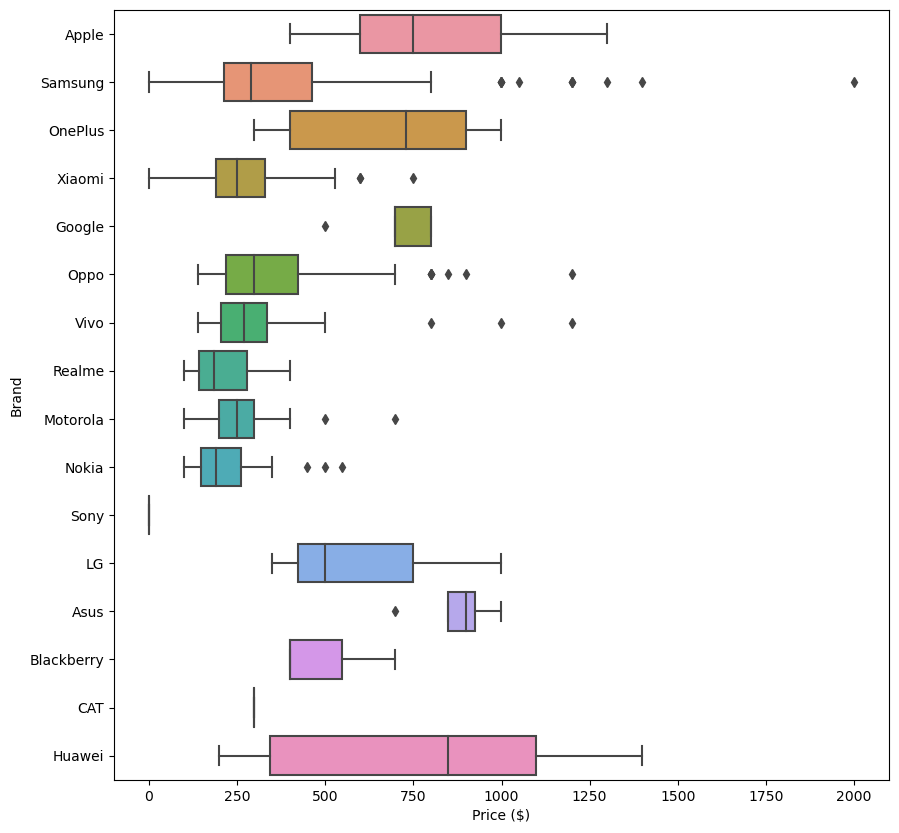

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="Price ($)", y="Brand")
plt.show()

In [44]:
df[(df["Brand"]=="Samsung") & (df["Price ($)"]>1000)]

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.8
288,Samsung,Galaxy Note 20 Ultra,256,12,4500,1299,3,108,12,12,0,6.9
309,Samsung,Galaxy S21 Ultra 5G,256,12,5000,1199,4,108,10,10,12,6.8
367,Samsung,Galaxy S20 Ultra 5G,512,16,5000,1399,4,108,48,12,3,6.9
373,Samsung,Galaxy Z Fold2 5G,256,12,4500,1999,3,12,12,12,0,7.6
392,Samsung,Galaxy S20 Ultra 5G,128,12,5000,1199,4,108,48,12,0,6.9
402,Samsung,Galaxy Note20 5G,128,8,4300,1049,3,12,64,12,0,6.7


In [45]:
df.drop([1,288,309,367,373,392,402],inplace=True)

In [46]:
df[(df["Brand"]=="Xiaomi") & (df["Price ($)"]>560)]

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
298,Xiaomi,Mi 11,256,8,4600,749,3,108,13,5,0,6.81
325,Xiaomi,Mi 10T Pro,256,8,5000,599,3,108,13,5,0,6.67
374,Xiaomi,Mi 10T Pro 5G,128,8,5000,599,3,108,13,5,0,6.67


In [47]:
df.drop([298,325,374],inplace=True)

In [48]:
df[(df["Brand"]=="Google") & (df["Price ($)"]<500)]

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
300,Google,Pixel 4a 5G,128,6,3885,499,2,12,16,0,0,6.2


In [49]:
df.drop(300,inplace=True)

In [50]:
df[(df["Brand"]=="Oppo") & (df["Price ($)"]>850)]

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
14,Oppo,Find X3 Pro,256,12,4500,1199,4,50,50,13,3,6.70
311,Oppo,Find X3 Neo 5G,256,12,4500,899,4,50,16,13,2,6.55


In [51]:
df.drop([14,311],inplace=True)

In [52]:
df[(df["Brand"]=="Vivo") & (df["Price ($)"]>850)]

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
9,Vivo,X70 Pro+,256,12,4500,1199,4,50,48,12,8,6.78
83,Vivo,X70 Pro+,256,12,4450,999,4,50,48,12,8,6.78


In [53]:
df.drop([9,83],inplace=True)

In [54]:
df[(df["Brand"]=="Motorola") & (df["Price ($)"]>550)]

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
85,Motorola,Edge 20 Pro,256,12,4500,699,3,108,16,8,0,6.7


In [55]:
df.drop([85],inplace=True)

In [56]:
df[(df["Brand"]=="Nokia") & (df["Price ($)"]>400)]

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
86,Nokia,XR20,128,6,4630,549,2,48,13,0,0,6.67
234,Nokia,X20,128,6,4470,449,4,64,5,2,2,6.67
296,Nokia,8.3 5G,128,8,4500,499,4,64,12,2,2,6.81


In [57]:
df.drop([86,234,296],inplace=True)

In [58]:
df[(df["Brand"]=="Asus") & (df["Price ($)"]<750)]

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
99,Asus,Zenfone 8,128,6,4000,699,2,64,12,0,0,5.9


In [59]:
df.drop([99],inplace=True)

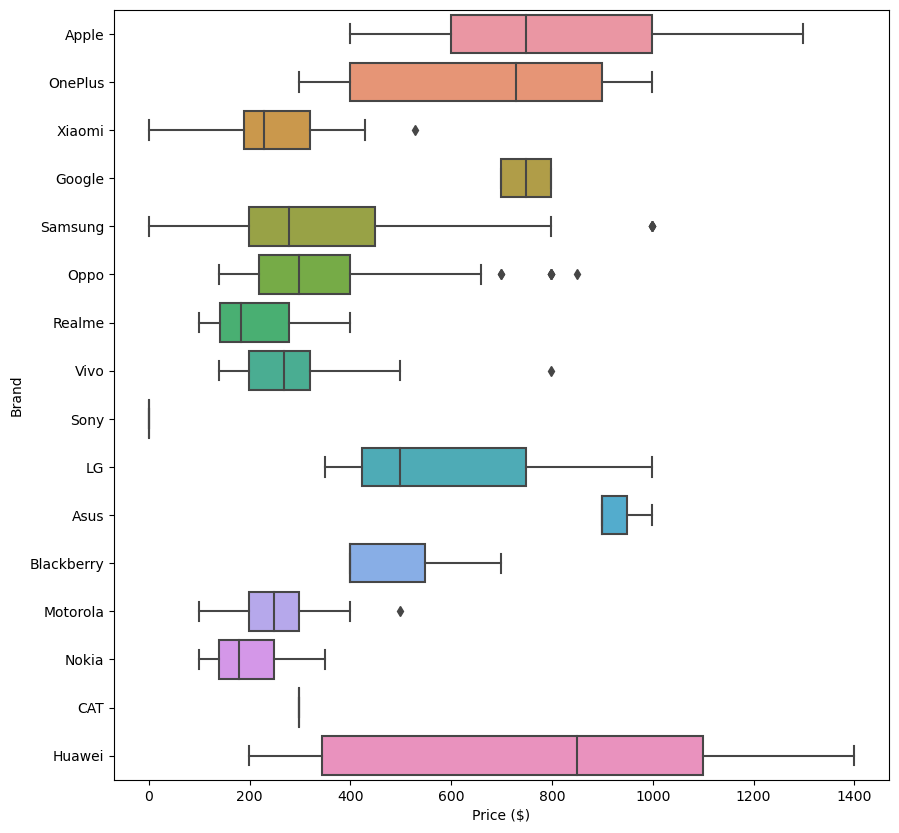

In [60]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="Price ($)", y="Brand")
plt.show()

# 3.Handling Skewness

In [61]:
df_cat=df.select_dtypes(object)

In [62]:
df_num=df.select_dtypes("int64","float64")

In [63]:
df_num.head()

,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4
0,128,6,3095,999,3,12,12,12,0
2,128,8,4500,899,4,48,50,8,2
3,128,6,5020,279,4,64,8,5,2
4,128,8,4614,799,2,50,12,0,0
5,128,4,2815,799,2,12,12,0,0


In [64]:
from scipy.stats import skew

Storage 
2.036292785439393


<Figure size 640x480 with 0 Axes>

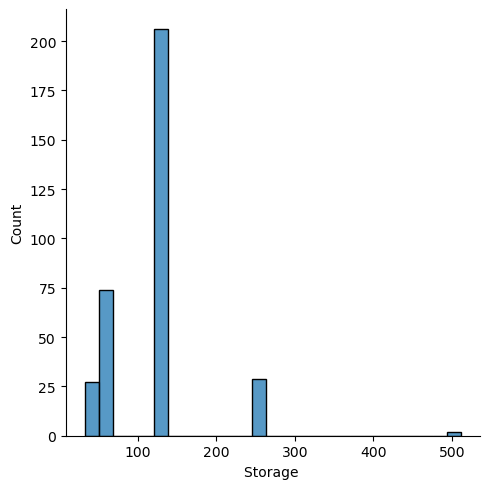

RAM 
0.8087808994870143


<Figure size 640x480 with 0 Axes>

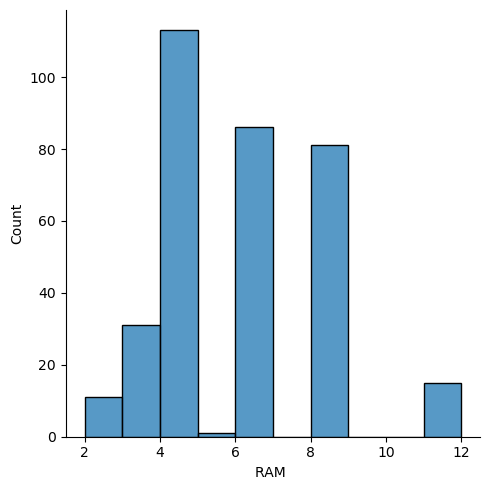

Battery Capacity (mAh)
-0.6756784831196827


<Figure size 640x480 with 0 Axes>

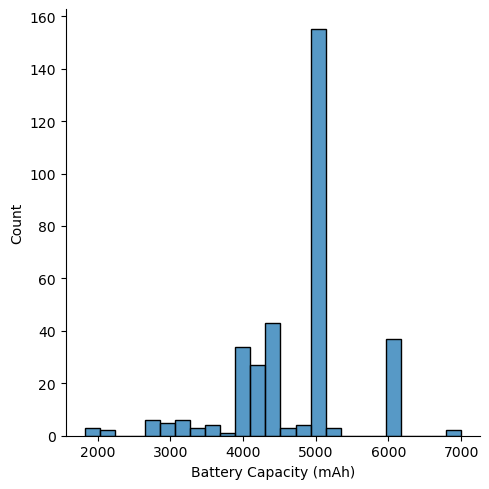

Price ($)
1.5332677371905938


<Figure size 640x480 with 0 Axes>

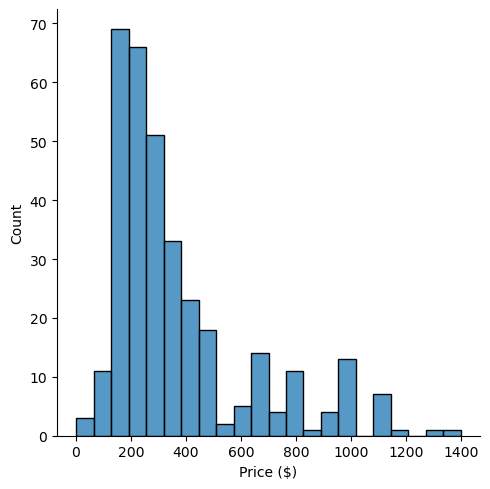

n_cameras
-0.47045820075384126


<Figure size 640x480 with 0 Axes>

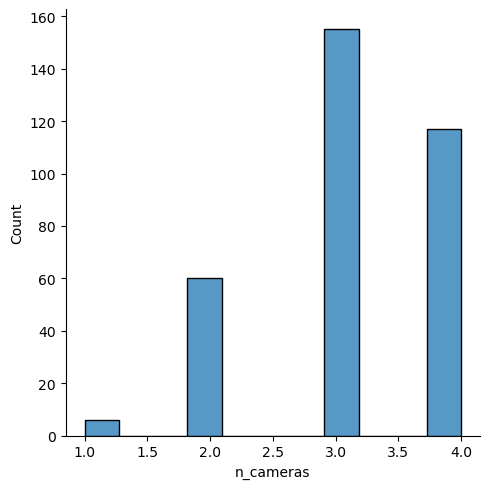

res1
0.21862172776242372


<Figure size 640x480 with 0 Axes>

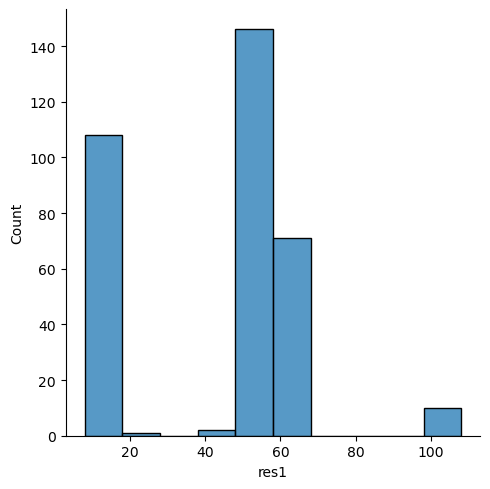

res2
3.691005539716504


<Figure size 640x480 with 0 Axes>

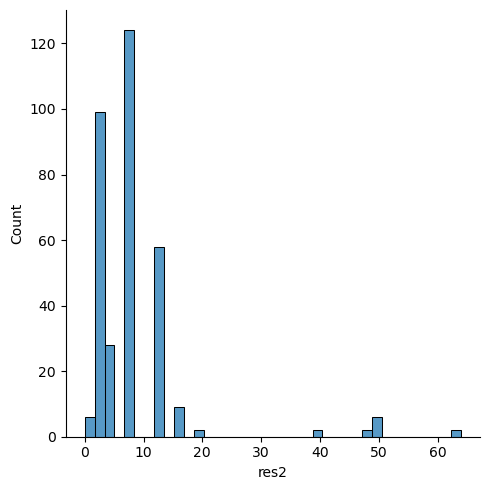

res3
4.792033219124717


<Figure size 640x480 with 0 Axes>

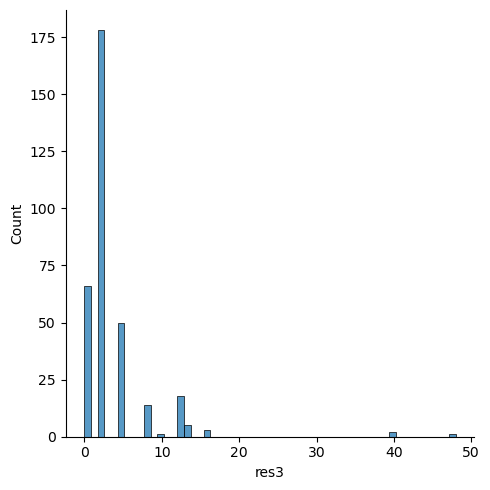

res4
2.0061640630313096


<Figure size 640x480 with 0 Axes>

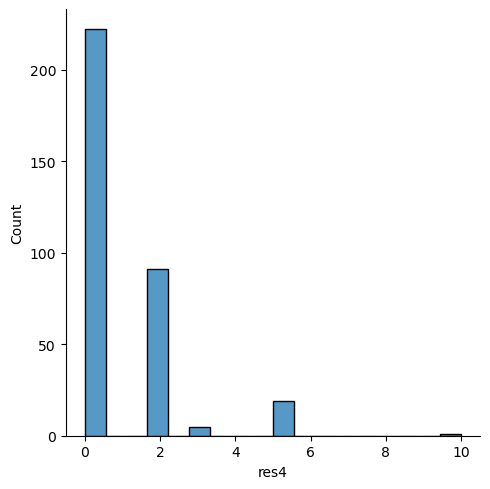

In [65]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.displot(df_num[col])
    plt.show()

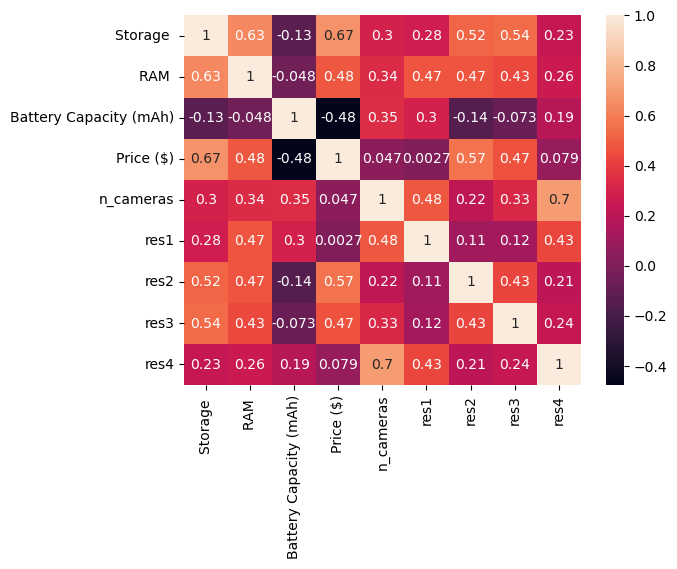

In [66]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

# Visualization

In [67]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.10
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.70
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12,0,0,6.40
5,Apple,iPhone 13,128,4,2815,799,2,12,12,0,0,6.10


In [68]:
brands_frequency_data=df["Brand"].value_counts()

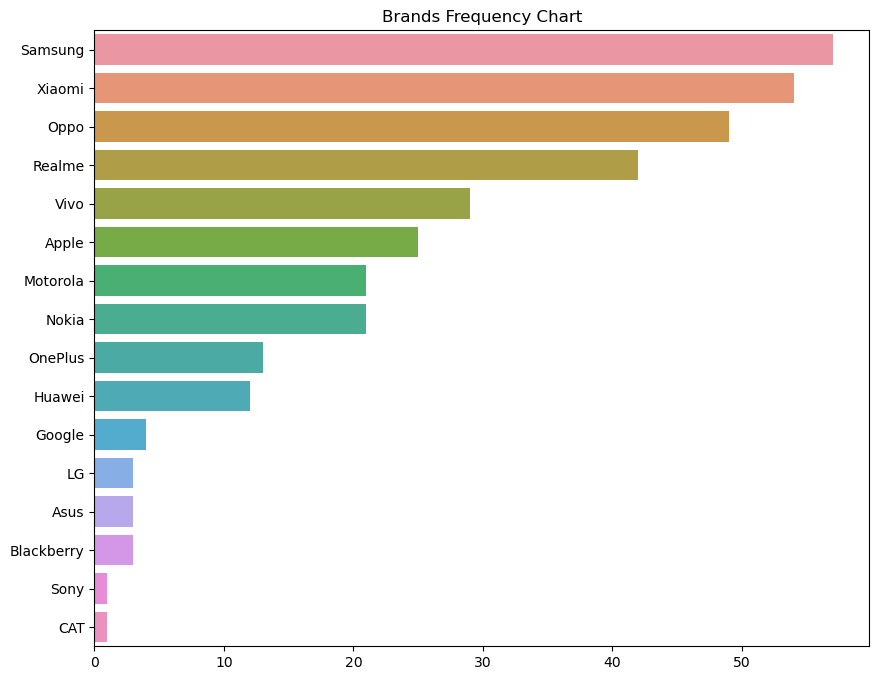

In [69]:
plt.figure(figsize=(10, 8))
# sns.barplot(data=brands_frequency_data.reset_index(), x='Brand', y='index')
sns.barplot(x=brands_frequency_data.values, y=brands_frequency_data.index)
plt.title('Brands Frequency Chart')
plt.show()


In [70]:
brands_average_price_data = df.groupby('Brand')['Price ($)'].mean()

In [71]:
brands_average_price_data

Brand
Apple         783.000000
Asus          932.333333
Blackberry    499.000000
CAT           299.000000
Google        749.000000
Huawei        783.166667
LG            615.666667
Motorola      252.333333
Nokia         191.857143
OnePlus       664.384615
Oppo          360.428571
Realme        208.047619
Samsung       355.719298
Sony            1.000000
Vivo          284.862069
Xiaomi        250.148148
Name: Price ($), dtype: float64

In [72]:
brands_average_price_data.reset_index()

,Brand,Price ($)
0,Apple,783.000000
1,Asus,932.333333
2,Blackberry,499.000000
3,CAT,299.000000
4,Google,749.000000
5,Huawei,783.166667
6,LG,615.666667
7,Motorola,252.333333
8,Nokia,191.857143
9,OnePlus,664.384615


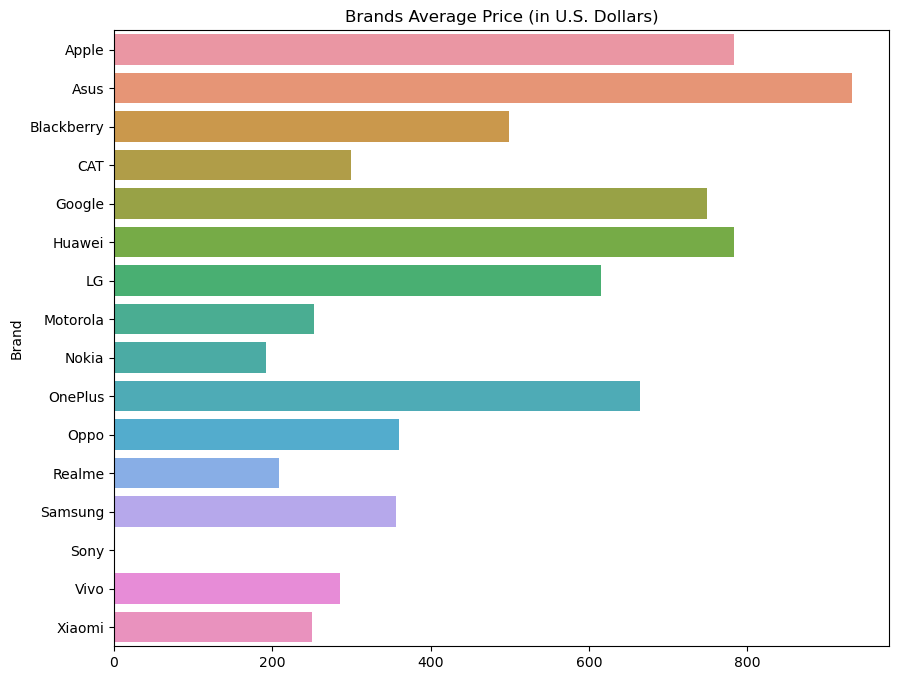

In [73]:
plt.figure(figsize=(10, 8))
# sns.barplot(data=brands_average_price_data.reset_index(), x='Price', y='Brand')
sns.barplot(x=brands_average_price_data.values, y=brands_average_price_data.index)
plt.title('Brands Average Price (in U.S. Dollars)')
plt.show()

# Encoding and decoding

In [74]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [75]:
df['Brand']=label_encoder.fit_transform(df['Brand'])


In [76]:
df=df.drop("Model",axis=1)

In [77]:
df=df.iloc[:,[0,1,2,3,5,6,7,8,9,10,4]]

In [78]:
df.head()

,Brand,Storage,RAM,Battery Capacity (mAh),n_cameras,res1,res2,res3,res4,screen,Price ($)
0,0,128,6,3095,3,12,12,12,0,6.10,999
2,9,128,8,4500,4,48,50,8,2,6.70,899
3,15,128,6,5020,4,64,8,5,2,6.67,279
4,4,128,8,4614,2,50,12,0,0,6.40,799
5,0,128,4,2815,2,12,12,0,0,6.10,799


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 405
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   338 non-null    int64  
 1   Storage                 338 non-null    int64  
 2   RAM                     338 non-null    int64  
 3   Battery Capacity (mAh)  338 non-null    int64  
 4   n_cameras               338 non-null    int64  
 5   res1                    338 non-null    int64  
 6   res2                    338 non-null    int64  
 7   res3                    338 non-null    int64  
 8   res4                    338 non-null    int64  
 9   screen                  338 non-null    float64
 10  Price ($)               338 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 39.8 KB


In [80]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [81]:
X.head()

,Brand,Storage,RAM,Battery Capacity (mAh),n_cameras,res1,res2,res3,res4,screen
0,0,128,6,3095,3,12,12,12,0,6.10
2,9,128,8,4500,4,48,50,8,2,6.70
3,15,128,6,5020,4,64,8,5,2,6.67
4,4,128,8,4614,2,50,12,0,0,6.40
5,0,128,4,2815,2,12,12,0,0,6.10


In [82]:
y.head()

0    999
2    899
3    279
4    799
5    799
Name: Price ($), dtype: int64

# Split data x and y

In [83]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

# Scaling data

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

# Apply Models
models = [LGBMRegressor,
         XGBRegressor,
         GradientBoostingRegressor,
         RandomForestRegressor,
         DecisionTreeRegressor,
         MLPRegressor,
         KNeighborsRegressor,
         SVR,
         CatBoostRegressor,
         LinearRegression,
         Lasso,
         Ridge,
         ElasticNet]

In [85]:
MAEList = []
RMSEList = []
R2List = []
modelsList = []
def modelSelect(mn):
    model = mn().fit(Xtrain, ytrain)
    ypred = model.predict(Xtest)
    RMSE = np.sqrt(mean_squared_error(ytest, ypred))
    MAE = mean_absolute_error(ytest, ypred)
    R2 = r2_score(ytest, ypred)
    if R2 < 0:
        R2 = 0
    RMSEList.append(RMSE)
    MAEList.append(MAE)
    R2List.append(R2)
    modelsList.append(mn.__name__)

In [86]:
models = [LGBMRegressor,
         XGBRegressor,
         GradientBoostingRegressor,
         RandomForestRegressor,
         DecisionTreeRegressor,
         MLPRegressor,
         KNeighborsRegressor,
         SVR,
         CatBoostRegressor,
         LinearRegression,
         Lasso,
         Ridge,
         ElasticNet]

In [87]:
for i in models:
    modelSelect(i)

Learning rate set to 0.032591
0:	learn: 260.8775171	total: 62.9ms	remaining: 1m 2s
1:	learn: 255.6203776	total: 63.3ms	remaining: 31.6s
2:	learn: 252.2595364	total: 63.4ms	remaining: 21.1s
3:	learn: 248.0044809	total: 63.8ms	remaining: 15.9s
4:	learn: 243.2571988	total: 64.1ms	remaining: 12.8s
5:	learn: 239.1386048	total: 64.5ms	remaining: 10.7s
6:	learn: 234.6600604	total: 64.7ms	remaining: 9.18s
7:	learn: 231.5193351	total: 65ms	remaining: 8.06s
8:	learn: 228.0376619	total: 65.3ms	remaining: 7.19s
9:	learn: 224.2051722	total: 65.6ms	remaining: 6.5s
10:	learn: 220.1272778	total: 65.9ms	remaining: 5.93s
11:	learn: 216.2437297	total: 73.7ms	remaining: 6.07s
12:	learn: 212.5630306	total: 74.2ms	remaining: 5.63s
13:	learn: 208.7451964	total: 74.6ms	remaining: 5.25s
14:	learn: 205.2893696	total: 75ms	remaining: 4.92s
15:	learn: 201.9049220	total: 75.4ms	remaining: 4.63s
16:	learn: 198.3858752	total: 75.7ms	remaining: 4.38s
17:	learn: 195.3163571	total: 76.1ms	remaining: 4.15s
18:	learn: 19

In [88]:
lmd = pd.concat([pd.DataFrame(MAEList),pd.DataFrame(RMSEList),pd.DataFrame(R2List)], axis = 1)

In [89]:
lmd.index = modelsList
lmd.columns = ["MAE","RMSE","R2"]

In [90]:
lmd

,MAE,RMSE,R2
LGBMRegressor,53.968795,94.369316,0.866869
XGBRegressor,61.312485,105.072781,0.834957
GradientBoostingRegressor,52.596115,84.692121,0.892774
RandomForestRegressor,50.231991,84.515763,0.893220
DecisionTreeRegressor,59.879085,108.802135,0.823034
MLPRegressor,316.739211,374.315561,0.000000
KNeighborsRegressor,72.229412,132.306695,0.738315
SVR,169.556610,270.202512,0.000000
CatBoostRegressor,48.201731,85.888896,0.889722
LinearRegression,97.685138,189.958334,0.460573


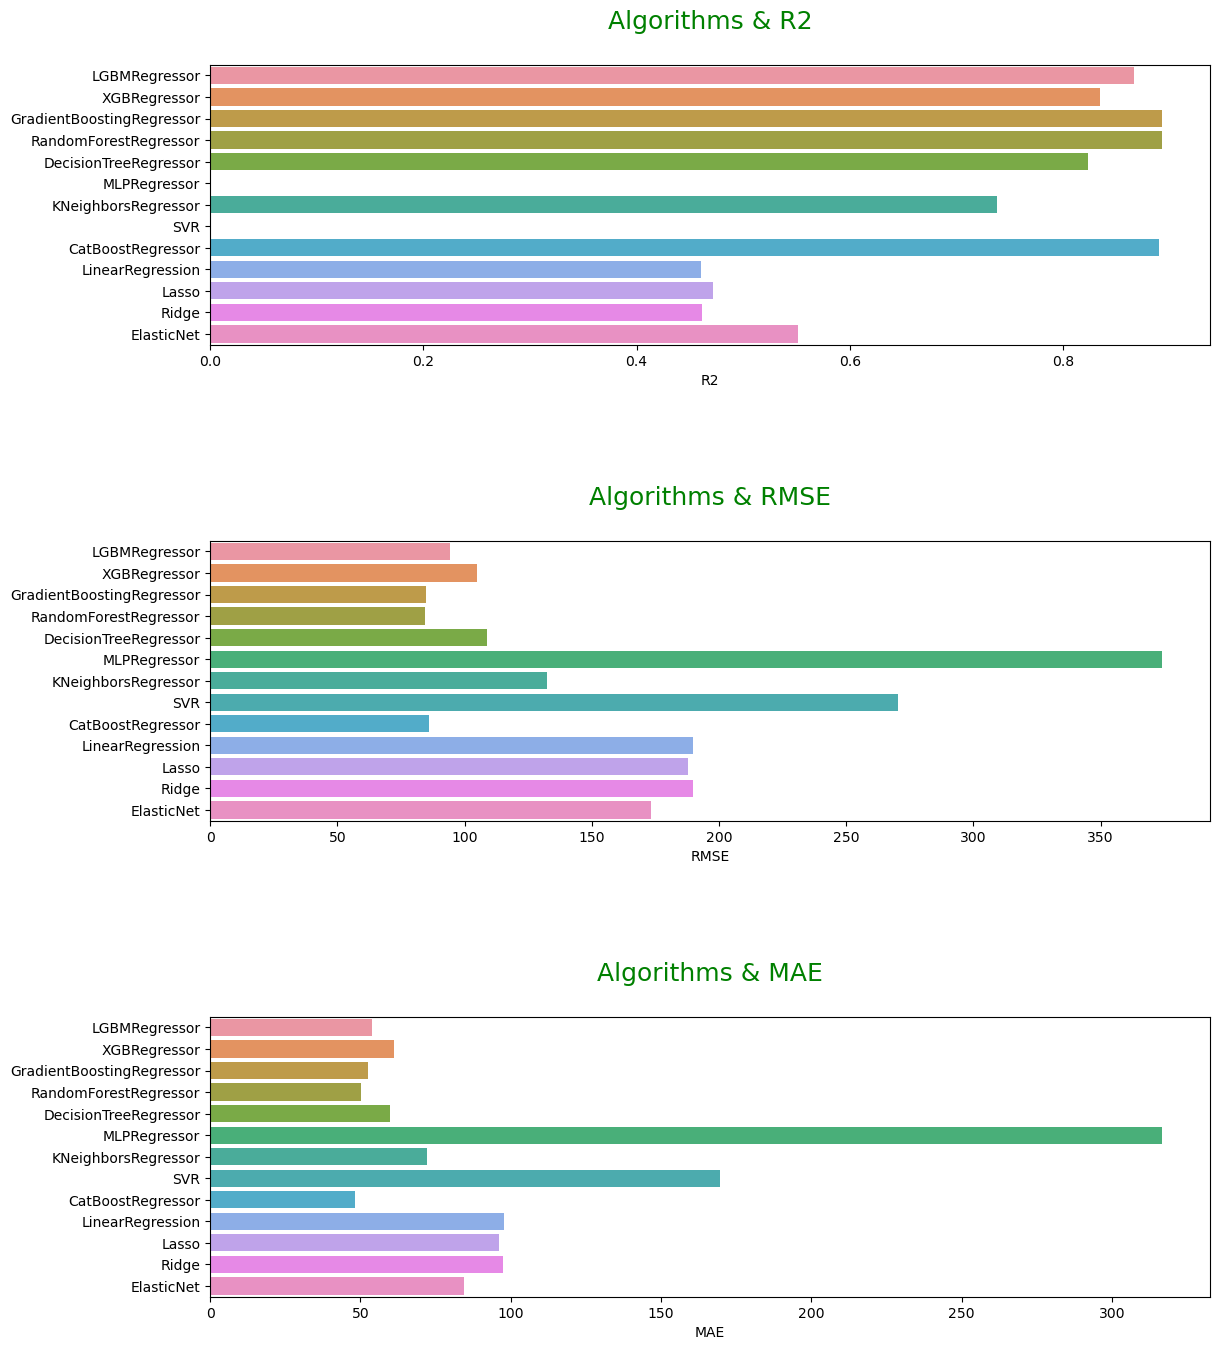

In [91]:
k = 1
canvas = plt.figure(figsize = (10,2.8))
for i in lmd.columns:
    g1 = canvas.add_axes([1, k, 1, 1])
    g1 = sns.barplot(x = "{}".format(i), y = lmd.index, data = lmd)
    g1.set_title("Algorithms & {}\n".format(i), fontdict={"fontsize":18, "color":"g"})
    k = k + 1.7

In [92]:
GBRModel=GradientBoostingRegressor().fit(Xtrain, ytrain)
GBRParams={"n_estimators":[10, 50, 100, 500],
           "learning_rate":[0.0001, 0.001, 0.01, 0.1, 1.0],
           "subsample":[0.5, 0.7, 1.0],
          "max_depth":[3, 7, 9]}
GBRRcv = GridSearchCV(GBRModel, GBRParams, cv = 10, verbose = 2, n_jobs = -1).fit(Xtrain, ytrain)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=10, subsample=0.5; tota

In [93]:
GBRRcv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

In [94]:
GBRTuned = GradientBoostingRegressor(learning_rate=0.1,max_depth=3,n_estimators=50,subsample=0.5).fit(Xtrain, ytrain)
GBRTunedyPred = GBRTuned.predict(Xtest)

In [95]:
print("Tuned GBR Root Mean Squared Error value : ", np.sqrt(mean_squared_error(ytest, GBRTunedyPred)))
print("Tuned GBR r² value : ", r2_score(ytest, GBRTunedyPred))
print("Tuned GBR Mean Absolute Error value : ", mean_absolute_error(ytest, GBRTunedyPred))

Tuned GBR Root Mean Squared Error value :  93.30977950372407
Tuned GBR r² value :  0.8698421584325322
Tuned GBR Mean Absolute Error value :  55.778901969753065
